In [2]:
import os
# Changing the working directory
os.chdir('..')
os.getcwd()

'/home/javiermunoz/Universidad/MasterBDyDS/TFM/TFM_DSBD'

In [5]:
import vidaug.augmentors as va 
from PIL import Image, ImageSequence
import cv2
import numpy as np

/home/javiermunoz/anaconda3/envs/tf/lib/python3.9/site-packages/requests/__init__.py:109: RequestsDependencyWarning: urllib3 (1.26.15) or chardet (None)/charset_normalizer (3.1.0) doesn't match a supported version!
  warnings.warn(


In [6]:
frame_step = 10
image_size = 0
read_counter = 0

def video_loader(path):
    frames = []
    
    cap = cv2.VideoCapture(path)
    ret = True
    while ret:
        ret,cv2_im = cap.read()
        if ret:
            converted = cv2.cvtColor(cv2_im,cv2.COLOR_BGR2RGB)

            pil_im = Image.fromarray(converted)

            if image_size:
                    pil_im_resize = pil_im.resize(image_size)
            else:
                    pil_im_resize = pil_im
                    
            frames.append(pil_im_resize)
                
    cap.release()
    return frames



In [7]:
path_video = "/home/javiermunoz/Universidad/MasterBDyDS/TFM/TFM_DSBD/data/subset_10_lsa_64/train/Barbecue/045_001_001.mp4"
frames = video_loader(path_video)

In [8]:
width_of_frame, height_of_frame = frames[0].size

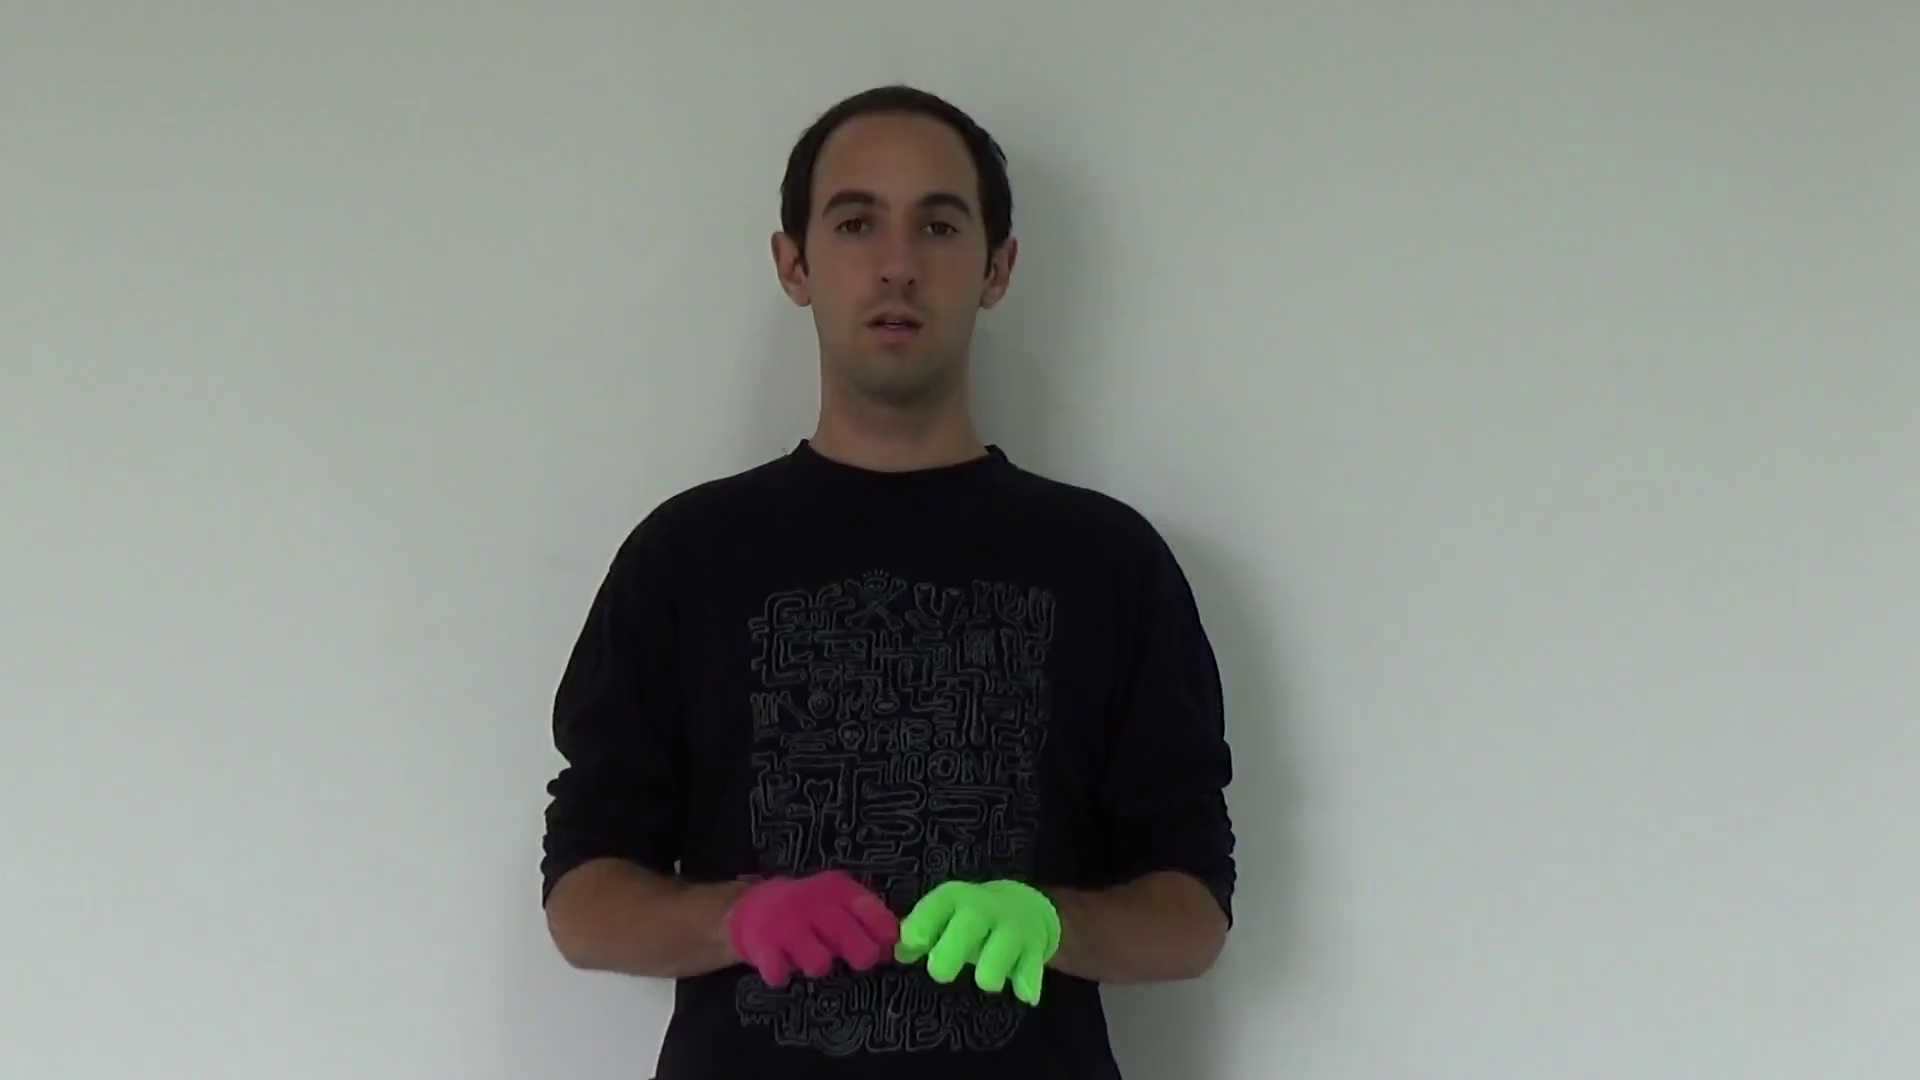

In [9]:
frames[0]

In [12]:
crop_factor = 0.1

height_of_frame_trans = int((35*(height_of_frame + (height_of_frame/10)))/height_of_frame)
width_of_frame_tras = int((35*(width_of_frame + (width_of_frame/5)))/width_of_frame)

center_crop_height = int(height_of_frame * crop_factor)
center_crop_width = int(width_of_frame * crop_factor)

random_crop_height = int(height_of_frame * crop_factor)
random_crop_width = int(width_of_frame * crop_factor)

seq = va.Sequential([
        va.RandomRotate(degrees=34),
        va.CenterCrop(size=(height_of_frame-center_crop_height, 
                                     width_of_frame-center_crop_width)),
        va.RandomCrop(size=(height_of_frame-random_crop_height, 
                                      width_of_frame-random_crop_width)),
        va.RandomTranslate(x=width_of_frame_tras, y=height_of_frame_trans),
        va.HorizontalFlip(),
    ])

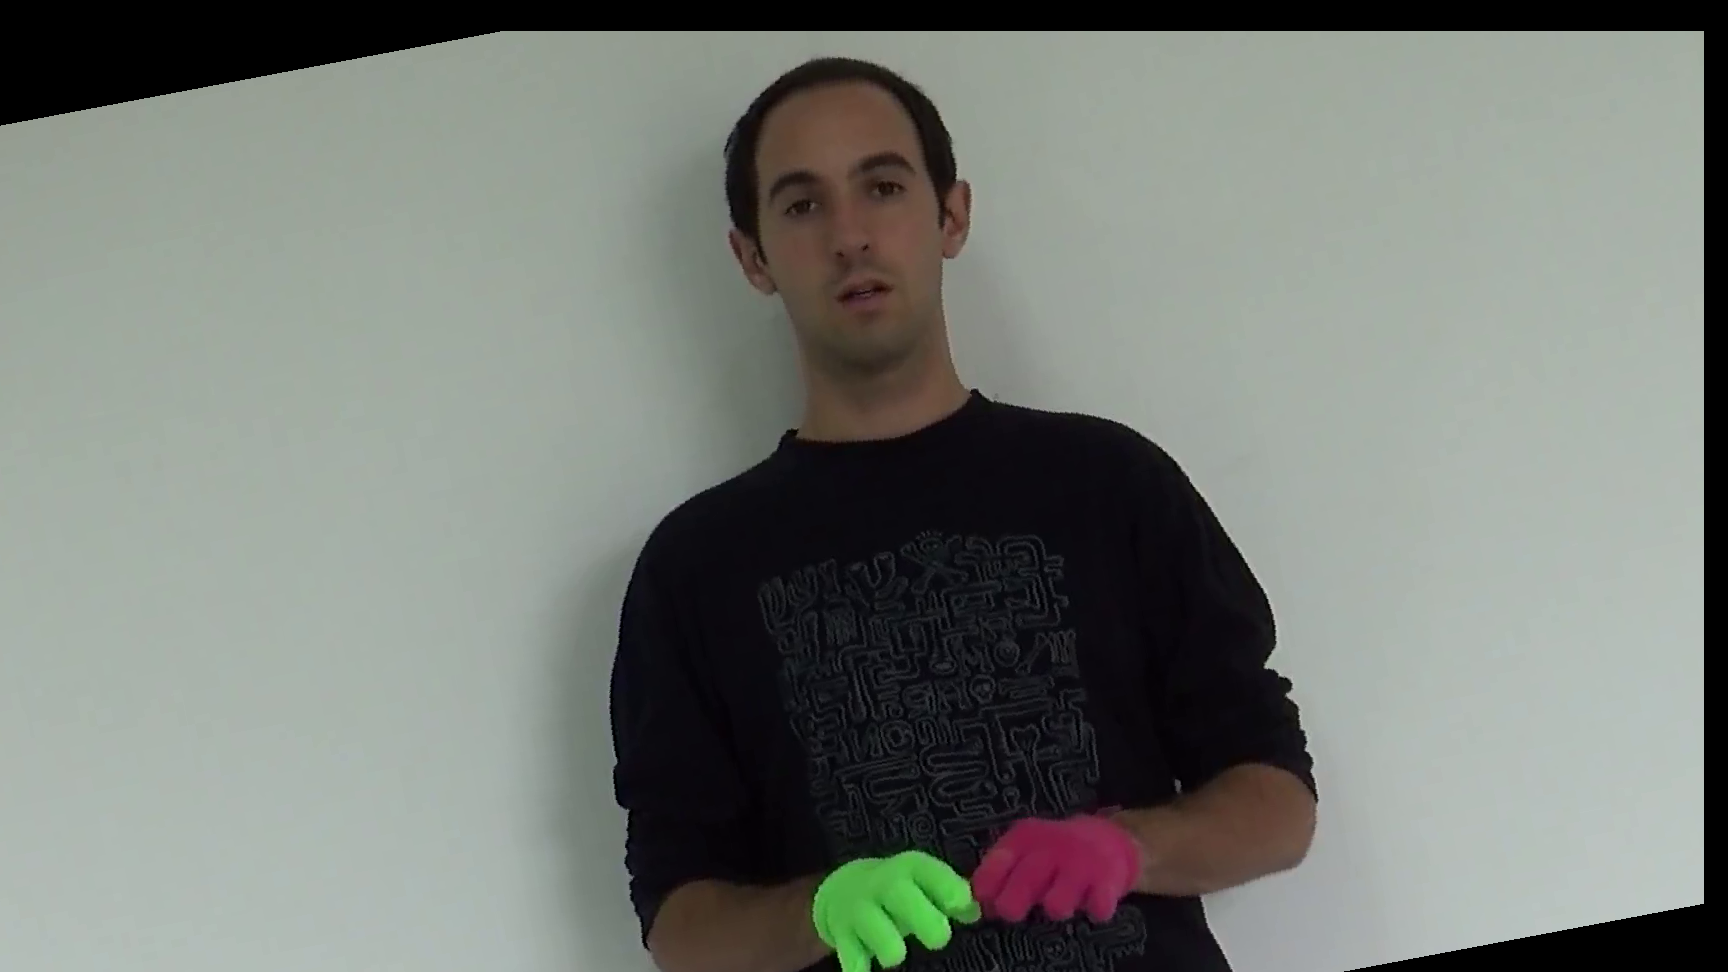

In [13]:
#augment the frames
video_aug = seq(frames)
video_aug[0]

In [9]:
frame_width, frame_height = video_aug[0].size

In [10]:
70/frame_width

0.24305555555555555

In [11]:
cv2_frames=[]
for frame in video_aug:
    open_cv_image = np.array(frame)
    cv2_frames.append(cv2.cvtColor(open_cv_image, cv2.COLOR_RGB2BGR))


In [12]:
cap = cv2.VideoCapture(path_video)
fps = cap.get(cv2.CAP_PROP_FPS)
fourCC = cv2.VideoWriter_fourcc("m", "p", "4", "v")
out = cv2.VideoWriter('./data/top_10/test/before/aug_test.mp4', fourCC, fps, (frame_width, frame_height))

In [13]:
for frame in cv2_frames:
    out.write(frame)

out.release()

In [14]:
vid_name = "08976.mp4"
vid_name.split(".")[0]

'08976'

In [15]:
SPLITS = ['train', 'val', 'test']
DATA_PATH = f"./data"

dataset = "top_10"

for sp in SPLITS:
    for gloss in os.listdir(os.path.join(DATA_PATH, dataset, sp)):
        frames = []
        for video_name in os.listdir(os.path.join(DATA_PATH, dataset, sp, gloss)):
            if "aug" in video_name:
                os.remove(os.path.join(DATA_PATH, dataset, sp, gloss, video_name))